# Agentic RAG


In [2]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY", "")
os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY", "")

In [3]:
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import FAISS
from langchain_openai import OpenAIEmbeddings
from langchain_text_splitters import RecursiveCharacterTextSplitter

USER_AGENT environment variable not set, consider setting it to identify your requests.


### Create Vector DB for LangGraph Blogs

In [22]:
urls = [
    "https://docs.langchain.com/oss/python/langgraph/overview",
    "https://docs.langchain.com/oss/python/langgraph/workflows-agents",
    "https://docs.langchain.com/oss/python/langgraph/thinking-in-langgraph#start-with-the-process-you-want-to-automate"
]

docs = WebBaseLoader(urls).load()
docs

[Document(metadata={'source': 'https://docs.langchain.com/oss/python/langgraph/overview', 'title': 'LangGraph overview - Docs by LangChain', 'language': 'en'}, page_content='LangGraph overview - Docs by LangChainSkip to main contentWe\'ve raised a $125M Series B to build the platform for agent engineering. Read more.Docs by LangChain home pageLangChain + LangGraphSearch...⌘KAsk AIGitHubTry LangSmithTry LangSmithSearch...NavigationLangGraph overviewLangChainLangGraphDeep AgentsIntegrationsLearnReferenceContributePythonOverviewLangGraph v1.0Release notesMigration guideGet startedInstallQuickstartLocal serverThinking in LangGraphWorkflows + agentsCapabilitiesPersistenceDurable executionStreamingInterruptsTime travelMemorySubgraphsProductionApplication structureStudioTestDeployAgent Chat UIObservabilityLangGraph APIsGraph APIFunctional APIRuntimeEnglishcloseOn this page InstallCore benefitsLangGraph ecosystemAcknowledgementsLangGraph overviewCopy pageCopy pageLangGraph v1.0 is now availabl

In [23]:
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000, chunk_overlap=100)
doc_splits = text_splitter.split_documents(docs)

doc_splits[:2]

[Document(metadata={'source': 'https://docs.langchain.com/oss/python/langgraph/overview', 'title': 'LangGraph overview - Docs by LangChain', 'language': 'en'}, page_content="LangGraph overview - Docs by LangChainSkip to main contentWe've raised a $125M Series B to build the platform for agent engineering. Read more.Docs by LangChain home pageLangChain + LangGraphSearch...⌘KAsk AIGitHubTry LangSmithTry LangSmithSearch...NavigationLangGraph overviewLangChainLangGraphDeep AgentsIntegrationsLearnReferenceContributePythonOverviewLangGraph v1.0Release notesMigration guideGet startedInstallQuickstartLocal serverThinking in LangGraphWorkflows + agentsCapabilitiesPersistenceDurable executionStreamingInterruptsTime travelMemorySubgraphsProductionApplication structureStudioTestDeployAgent Chat UIObservabilityLangGraph APIsGraph APIFunctional APIRuntimeEnglishcloseOn this page InstallCore benefitsLangGraph ecosystemAcknowledgementsLangGraph overviewCopy pageCopy pageLangGraph v1.0 is now available

In [24]:
# Createing a vector store and storing it
langraph_vector_store = FAISS.from_documents(
    documents=doc_splits,
    embedding=OpenAIEmbeddings()

)

langgraph_retriever = langraph_vector_store.as_retriever()

In [25]:
# test the retriever
langgraph_retriever.invoke("what is langgraph?")

[Document(id='0b910d27-4a9c-4176-90e9-f432bc18a1d1', metadata={'source': 'https://docs.langchain.com/oss/python/langgraph/overview', 'title': 'LangGraph overview - Docs by LangChain', 'language': 'en'}, page_content="LangGraph overview - Docs by LangChainSkip to main contentWe've raised a $125M Series B to build the platform for agent engineering. Read more.Docs by LangChain home pageLangChain + LangGraphSearch...⌘KAsk AIGitHubTry LangSmithTry LangSmithSearch...NavigationLangGraph overviewLangChainLangGraphDeep AgentsIntegrationsLearnReferenceContributePythonOverviewLangGraph v1.0Release notesMigration guideGet startedInstallQuickstartLocal serverThinking in LangGraphWorkflows + agentsCapabilitiesPersistenceDurable executionStreamingInterruptsTime travelMemorySubgraphsProductionApplication structureStudioTestDeployAgent Chat UIObservabilityLangGraph APIsGraph APIFunctional APIRuntimeEnglishcloseOn this page InstallCore benefitsLangGraph ecosystemAcknowledgementsLangGraph overviewCopy p

In [ ]:
from langchain_core.tools.retriever import create_retriever_tool
langgraph_retriever_tool = create_retriever_tool(langgraph_retriever,
                                                 "retriever_vector_db_blog",
                                                 "Search and learn information about langgraph")

In [37]:
langgraph_retriever_tool

Tool(name='retriever_vector_db_blog', description='Search and run information about langgraph', args_schema=<class 'langchain_core.tools.retriever.RetrieverInput'>, func=functools.partial(<function _get_relevant_documents at 0x00000244D6A423E0>, retriever=VectorStoreRetriever(tags=['FAISS', 'OpenAIEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x000002452D41E2A0>, search_kwargs={}), document_prompt=PromptTemplate(input_variables=['page_content'], input_types={}, partial_variables={}, template='{page_content}'), document_separator='\n\n', response_format='content'), coroutine=functools.partial(<function _aget_relevant_documents at 0x00000244D721C5E0>, retriever=VectorStoreRetriever(tags=['FAISS', 'OpenAIEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x000002452D41E2A0>, search_kwargs={}), document_prompt=PromptTemplate(input_variables=['page_content'], input_types={}, partial_variables={}, template='{page_content}'), 

### Create Vector DB for langchain Blogs

In [28]:
urls = [
    "https://docs.langchain.com/oss/python/langchain/overview",
    "https://docs.langchain.com/oss/python/langchain/rag",
    "https://docs.langchain.com/oss/python/langchain/short-term-memory"

]

docs = WebBaseLoader(urls).load()
docs

[Document(metadata={'source': 'https://docs.langchain.com/oss/python/langchain/overview', 'title': 'LangChain overview - Docs by LangChain', 'language': 'en'}, page_content='LangChain overview - Docs by LangChainSkip to main contentWe\'ve raised a $125M Series B to build the platform for agent engineering. Read more.Docs by LangChain home pageLangChain + LangGraphSearch...⌘KAsk AIGitHubTry LangSmithTry LangSmithSearch...NavigationLangChain overviewLangChainLangGraphDeep AgentsIntegrationsLearnReferenceContributePythonOverviewLangChain v1.0Release notesMigration guideGet startedInstallQuickstartPhilosophyCore componentsAgentsModelsMessagesToolsShort-term memoryStreamingMiddlewareStructured outputAdvanced usageGuardrailsRuntimeContext engineeringModel Context Protocol (MCP)Human-in-the-loopMulti-agentRetrievalLong-term memoryUse in productionStudioTestDeployAgent Chat UIObservabilityEnglishcloseOn this page Install Create an agent Core benefitsLangChain overviewCopy pageCopy pageLangChai

In [29]:
# split the docs
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000, chunk_overlap=100)

doc_splits = text_splitter.split_documents(docs)

In [31]:
langchain_vector_store = FAISS.from_documents(
    embedding=OpenAIEmbeddings(),
    documents=doc_splits

)

langchain_retriever = langchain_vector_store.as_retriever()

In [38]:
langchain_retriever_tool = create_retriever_tool(
    langchain_retriever,
    "retriever_tool_vector_langchain_blog",
    "Search and learn information about langchain"

)

In [39]:
tools = [langgraph_retriever_tool, langchain_retriever_tool]

### LangGraph Workflow

In [40]:
from typing import Annotated, Sequence
from typing_extensions import TypedDict
from langchain_core.messages import BaseMessage
from langgraph.graph.message import add_messages

class AgentState(TypedDict):
    messages: Annotated[Sequence[BaseMessage], add_messages]

In [41]:
from langchain_groq import ChatGroq

llm = ChatGroq(model="openai/gpt-oss-20b")
llm.invoke("Hi")

AIMessage(content='Hello! 👋 How can I help you today?', additional_kwargs={'reasoning_content': 'User says "Hi". It\'s a greeting. We need to respond with a friendly greeting.'}, response_metadata={'token_usage': {'completion_tokens': 39, 'prompt_tokens': 72, 'total_tokens': 111, 'completion_time': 0.038507038, 'prompt_time': 0.003350416, 'queue_time': 0.047895651, 'total_time': 0.041857454, 'completion_tokens_details': {'reasoning_tokens': 19}}, 'model_name': 'openai/gpt-oss-20b', 'system_fingerprint': 'fp_e99e93f2ac', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--fe96e4be-bb1e-43e6-b855-bf06702c4eb8-0', usage_metadata={'input_tokens': 72, 'output_tokens': 39, 'total_tokens': 111})

In [42]:
# bind tools with llm
llm_with_tools = llm.bind_tools(tools)

In [43]:
def agent(state: AgentState):
    """Invokes the agent model to generate a response based on the current state. Given the question, it will decide to retrive using the retriever tool, or simply end.

    Args:
        state (AgentState): The current state

    Returns:
        dict: The updated state with the agent response appended to messages
    """
    print("--- CALL AGENT ---")
    messages = state["messages"]
    response = llm_with_tools.invoke(messages)
    return {"messages": [response]}

In [ ]:
from typing import Literal
from langsmith import Client
from langchain_core.messages import BaseMessage, HumanMessage
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import PromptTemplate
from pydantic import BaseModel, Field

In [46]:
# data model
class grade(BaseModel):
    """ binary score for relavance check """
    binary_score: str = Field(description="Relevence score 'yes' or 'no' ")

# Routing function
def grade_documents(state: AgentState) -> Literal["generate", "rewrite"]:
    """Determines whether the retrieved documents are relavant to the question.

    Args:
        state (AgentState): the current state

    Returns:
        str: A decision for whether the documents are relevant or not
    """
    print("--- CHECK RELAVANCE ---")

    # setup the prompt
    prompt = PromptTemplate.from_template(
        template="""
    You are a grade assessing relevance of a retrieved document to a user question. \n
    Here is the retrieved document: \n\n {context}\n\n
    Here is the user question: {question}: \n
    If the document contains keyword(s) or semantic meaning related to the user question, grade it as relavant. \n give a binary score 'yes' or 'no' score to indicate whether the document is relevant to the question.
    """
    )

    # create chain
    chain = prompt | llm_with_tools
    messages = state["messages"]
    last_message = messages[-1]

    question = messages[0].content
    docs = last_message.content

    score = chain.invoke({"question": question, "context": docs})

    if score == 'yes':
        print("--- DECISION: DOCS RELEVANT ---")
        return "generate"

    else:
        print("--- DOCS ARE IRRELEVANT ---")
        return "rewrite"

In [47]:
# generate function
def generate(state: AgentState):
    """ 
    Generate answer

    Args:
        state (AgentState): The current State

    Returns:
        dict: The updated message

    """
    print("--- GENERATE ---")
    messages = state["messages"]
    question = messages[0].content
    last_message = messages[-1]

    docs = last_message.content

    prompt = Client(api_key=os.getenv('LANGCHAIN_API_KEY')
                    ).pull_prompt("rlm/rag-prompt")

    # chain
    rag_chain = prompt | llm | StrOutputParser()

    response = rag_chain.invoke({"context": docs, "question": question})
    return {"messages": [response]}

In [48]:
def rewrite(state: AgentState):
    """Transform the query to produce a better question.

    Args:
        state (AgentState): The current state

    Returns:
        dict: the updated state with re-phrased question
    """
    print('--- TRANSFORM QUERY ---')
    messages = state["messages"]
    question = messages[0].content

    msg = [
        HumanMessage(
            content=f""" \n Look at the input and try to reason about the underlying semantic intent/ meaning. \n
            Here is the initial question:
            \n --------\n
            {question}
            \n---------\n
            Formulate an improved question: 
            """
        )
    ]

    # grader
    response = llm.invoke(msg)
    return {"messages": [response]}

In [52]:
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt.tool_node import ToolNode, tools_condition

workflow = StateGraph(AgentState)

# define the nodes
workflow.add_node("agent", agent)
workflow.add_node("tools", ToolNode(tools))
workflow.add_node("rewrite", rewrite)
workflow.add_node("generate", generate)

# add edges
workflow.add_edge(START, "agent")
workflow.add_conditional_edges("agent", tools_condition)
workflow.add_conditional_edges("tools", grade_documents)

workflow.add_edge("generate", END)
workflow.add_edge("rewrite", "agent")

graph = workflow.compile()

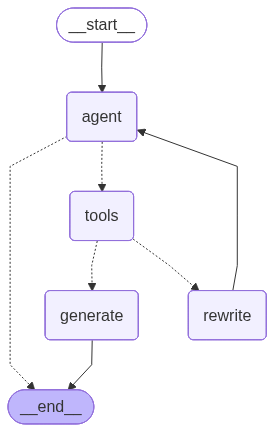

In [56]:
from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))

In [57]:
graph.invoke({"messages": "What is langgraph?"})

--- CALL AGENT ---
--- CHECK RELAVANCE ---
--- DOCS ARE IRRELEVANT ---
--- TRANSFORM QUERY ---
--- CALL AGENT ---


{'messages': [HumanMessage(content='What is langgraph?', additional_kwargs={}, response_metadata={}, id='af8149b3-f3e8-4563-be23-4a61edd6cf05'),
  AIMessage(content='', additional_kwargs={'reasoning_content': 'We need to answer "What is langgraph?" The user likely wants an explanation. Use the tools? There\'s a function retriever_vector_db_blog. That might fetch info about langgraph. Let\'s use it.', 'tool_calls': [{'id': 'fc_321ac6b1-784a-423b-88f5-1aba5a735630', 'function': {'arguments': '{"query":"langgraph"}', 'name': 'retriever_vector_db_blog'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 71, 'prompt_tokens': 173, 'total_tokens': 244, 'completion_time': 0.07199174, 'prompt_time': 0.115664566, 'queue_time': 0.051736804, 'total_time': 0.187656306, 'completion_tokens_details': {'reasoning_tokens': 43}}, 'model_name': 'openai/gpt-oss-20b', 'system_fingerprint': 'fp_e99e93f2ac', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': N